In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('2019-Oct.csv')

In [5]:
dataset.shape

(42448764, 9)

In [6]:
sampled_user_ids = dataset['user_id'].drop_duplicates().sample(frac=1/20, random_state=42)

data = dataset[dataset['user_id'].isin(sampled_user_ids)]

In [7]:
data.shape

(2123106, 9)

In [8]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
event_time            0
event_type            0
product_id            0
category_id           0
category_code    671945
brand            306284
price                 0
user_id               0
user_session          0
dtype: int64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2123106 entries, 12 to 42448759
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 162.0+ MB


In [10]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
12,2019-10-01 00:00:13 UTC,view,3900746,2053013552326770905,appliances.environment.water_heater,haier,102.38,555444559,98b88fa0-d8fa-4b9d-8a71-3dd403afab85
38,2019-10-01 00:00:31 UTC,view,3900746,2053013552326770905,appliances.environment.water_heater,haier,102.38,555444559,98b88fa0-d8fa-4b9d-8a71-3dd403afab85
71,2019-10-01 00:01:00 UTC,view,3900930,2053013552326770905,appliances.environment.water_heater,teploross,90.32,555444559,98b88fa0-d8fa-4b9d-8a71-3dd403afab85
103,2019-10-01 00:01:30 UTC,view,3900930,2053013552326770905,appliances.environment.water_heater,teploross,90.32,555444559,98b88fa0-d8fa-4b9d-8a71-3dd403afab85
113,2019-10-01 00:01:36 UTC,view,1003549,2053013555631882655,electronics.smartphone,samsung,344.64,546089729,796f2f69-c266-4202-a583-b87394db8469


In [11]:
data.describe()

,product_id,category_id,price,user_id
count,2.123106e+06,2.123106e+06,2.123106e+06,2.123106e+06
mean,1.049918e+07,2.057387e+18,2.912873e+02,5.334914e+08
std,1.182813e+07,1.842863e+16,3.579139e+02,1.857523e+07
min,1.000978e+06,2.053014e+18,0.000000e+00,2.474128e+08
25%,1.005159e+06,2.053014e+18,6.688000e+01,5.158139e+08
50%,4.900386e+06,2.053014e+18,1.654900e+02,5.294403e+08
75%,1.590167e+07,2.053014e+18,3.600300e+02,5.517363e+08
max,6.050000e+07,2.175420e+18,2.574070e+03,5.662804e+08


### Preprocessing - Category

In [12]:
# we observe that category_code has three levels
# we will extract the category_code into 3 separate columns
# for easier processing

data[['category1','category2','category3']] = data['category_code'].str.split('.', n=2,expand=True)

C:\Users\12626\AppData\Local\Temp\ipykernel_6624\3481214662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['category1','category2','category3']] = data['category_code'].str.split('.', n=2,expand=True)
C:\Users\12626\AppData\Local\Temp\ipykernel_6624\3481214662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['category1','category2','category3']] = data['category_code'].str.split('.', n=2,expand=True)
C:\Users\12626\AppData\Local\Temp\ipykernel_6624\3481214662.py:5: SettingWithCopyWarning

In [13]:
data = data.fillna('Unkown')

In [14]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category1,category2,category3
12,2019-10-01 00:00:13 UTC,view,3900746,2053013552326770905,appliances.environment.water_heater,haier,102.38,555444559,98b88fa0-d8fa-4b9d-8a71-3dd403afab85,appliances,environment,water_heater
38,2019-10-01 00:00:31 UTC,view,3900746,2053013552326770905,appliances.environment.water_heater,haier,102.38,555444559,98b88fa0-d8fa-4b9d-8a71-3dd403afab85,appliances,environment,water_heater
71,2019-10-01 00:01:00 UTC,view,3900930,2053013552326770905,appliances.environment.water_heater,teploross,90.32,555444559,98b88fa0-d8fa-4b9d-8a71-3dd403afab85,appliances,environment,water_heater
103,2019-10-01 00:01:30 UTC,view,3900930,2053013552326770905,appliances.environment.water_heater,teploross,90.32,555444559,98b88fa0-d8fa-4b9d-8a71-3dd403afab85,appliances,environment,water_heater
113,2019-10-01 00:01:36 UTC,view,1003549,2053013555631882655,electronics.smartphone,samsung,344.64,546089729,796f2f69-c266-4202-a583-b87394db8469,electronics,smartphone,Unkown
...,...,...,...,...,...,...,...,...,...,...,...,...
42448555,2019-10-31 23:58:29 UTC,view,1004553,2053013555631882655,electronics.smartphone,inoi,61.38,516826105,55d5be8e-8a4f-4691-b192-93c9193e3b1d,electronics,smartphone,Unkown
42448606,2019-10-31 23:58:52 UTC,view,2300295,2053013560530830019,electronics.camera.video,gopro,231.41,537931532,22c57267-da98-4f28-9a9c-18bb5b385193,electronics,camera,video
42448622,2019-10-31 23:58:58 UTC,view,19300029,2053013566033757167,appliances.ironing_board,nika,24.43,541321524,ac6dde9e-06cb-4dac-8e36-d138e04a9c37,appliances,ironing_board,Unkown
42448680,2019-10-31 23:59:26 UTC,view,2300295,2053013560530830019,electronics.camera.video,gopro,231.41,537931532,22c57267-da98-4f28-9a9c-18bb5b385193,electronics,camera,video


In [15]:
category1_count = data["category1"].nunique()
category2_count = data["category2"].nunique()
category3_count = data["category3"].nunique()
print( 'MainCategories   :', category1_count, '\nSubCategories.   :',category2_count, '\nSubSubCategories :',category3_count)

MainCategories   : 14 
SubCategories.   : 58 
SubSubCategories : 84


In [16]:
category1 = data.groupby('category1')['product_id'].nunique().sort_values(ascending=False).reset_index()

In [17]:
main_Cat = category1.copy()

main_Cat.iloc[7] = ['other',main_Cat.iloc[7:]['product_id'].sum()]

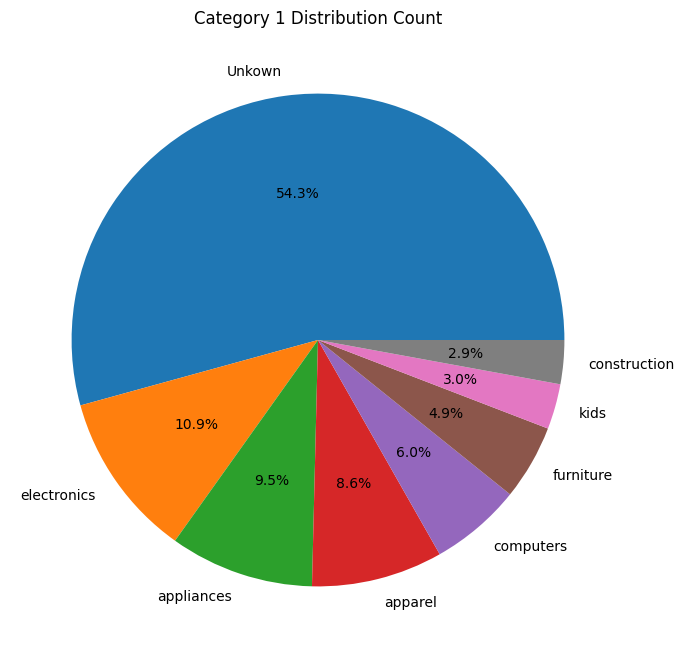

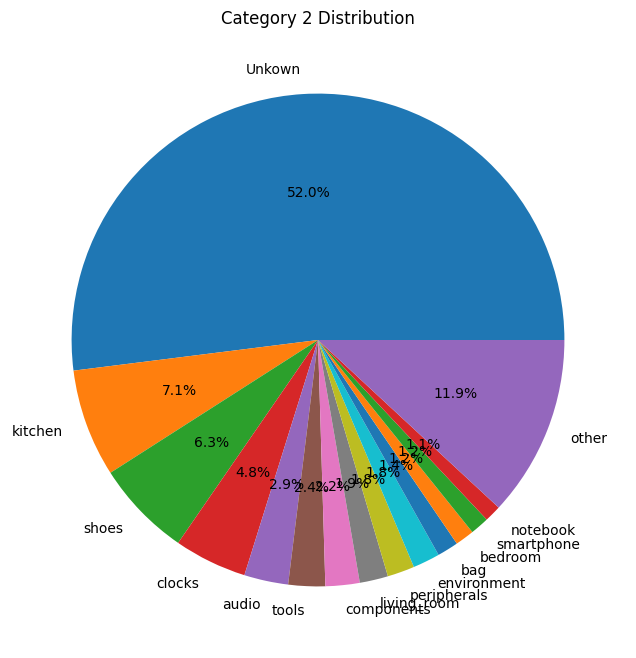

In [18]:
# Plotting for Category 1 Distribution
plt.figure(figsize=(15, 8))
plt.pie(data=category1.iloc[:8], x='product_id', labels='category1', autopct='%1.1f%%')
plt.title('Category 1 Distribution Count')
plt.show()

# Grouping and plotting for Category 2 Distribution
category2 = data.groupby('category2')['product_id'].nunique().sort_values(ascending=False).reset_index()
category2.columns = ['sub_category', 'count']

# Consolidating less frequent categories under 'other'
category2_copy = category2.copy()
category2_copy.iloc[14] = ['other', category2.iloc[14:]['count'].sum()]

plt.figure(figsize=(15, 8))
plt.pie(data=category2_copy.iloc[0:15], x='count', labels='sub_category', autopct='%1.1f%%')
plt.title('Category 2 Distribution')
plt.show()


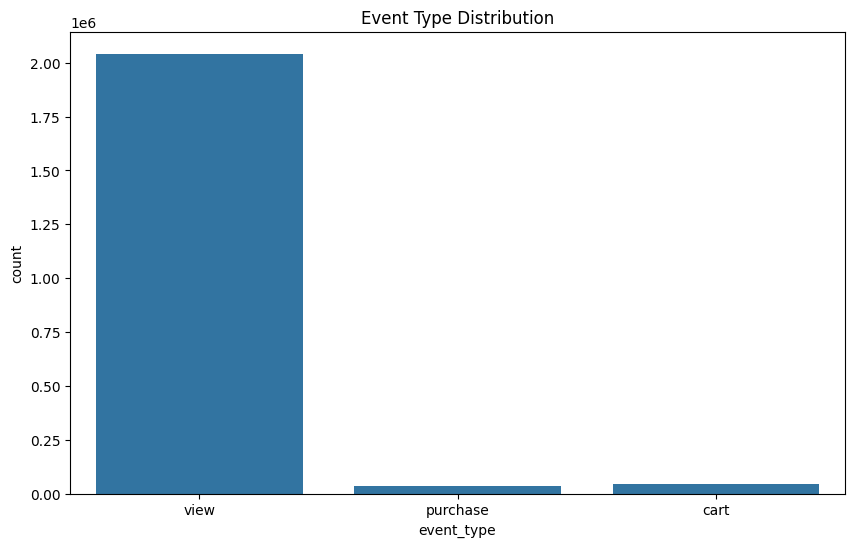

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='event_type')
plt.title("Event Type Distribution")
plt.show()

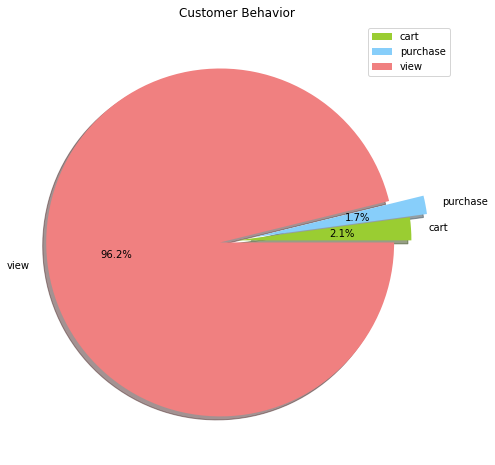

In [42]:
e_type=data.groupby('event_type').size().reset_index(name='total')

colors = ['yellowgreen', 'lightskyblue','lightcoral']
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(e_type['total'],colors=colors, labels=e_type['event_type'],explode=[0, 0.1,0.1], shadow = True, autopct='%1.1f%%')

plt.axis('off')
plt.title('Customer Behavior')
plt.legend()
plt.show()

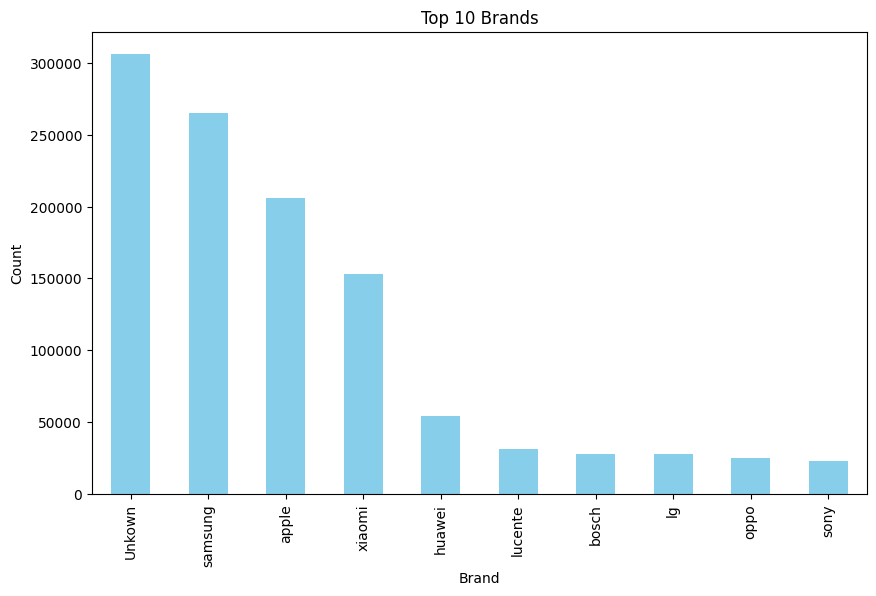

In [20]:
top_10_brands = data['brand'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_brands.plot(kind='bar', color='skyblue')
plt.title("Top 10 Brands")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

In [21]:
data['user_session'].nunique()

462575

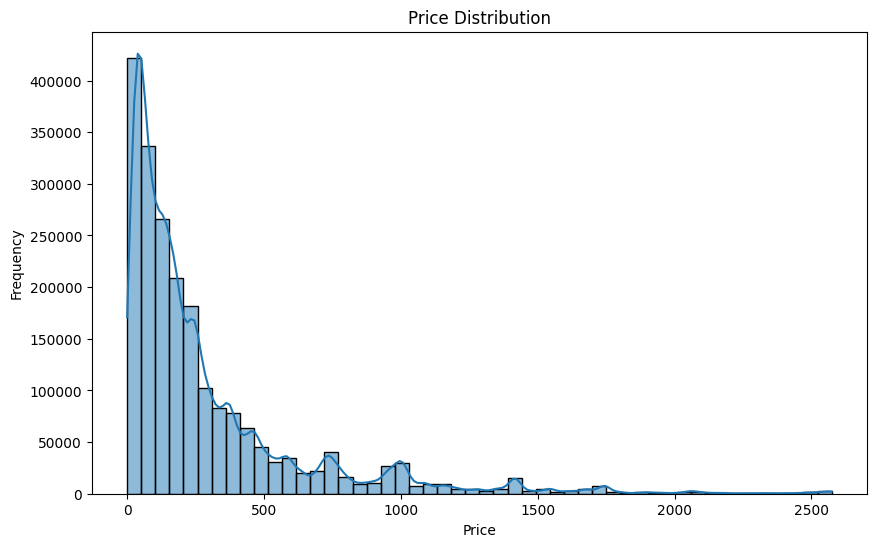

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

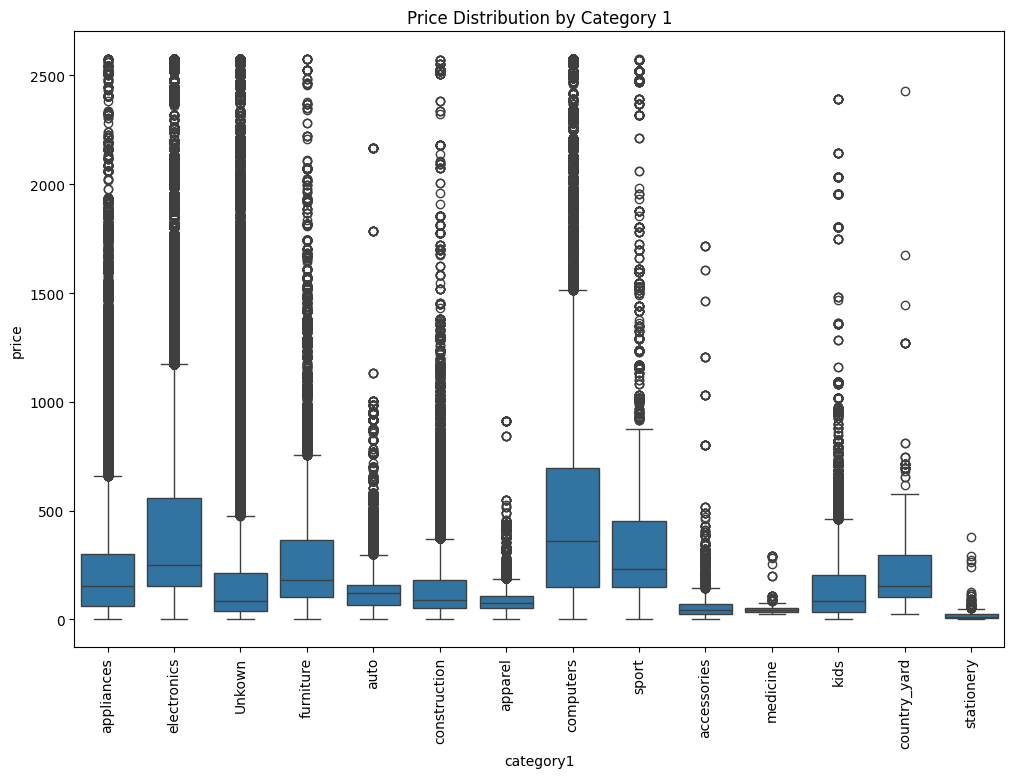

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='category1', y='price')
plt.xticks(rotation=90)
plt.title("Price Distribution by Category 1")
plt.show()

### Preprocessing - Datetime

In [24]:
data['event_time'] = pd.to_datetime(data['event_time'], utc=True)

data['event_time'] = data['event_time'].dt.tz_convert('Asia/Shanghai')

In [25]:
data['year'], data['month'], data['day'], data['hour'] = data['event_time'].dt.year,  data['event_time'].dt.month,  data['event_time'].dt.day, data['event_time'].dt.hour

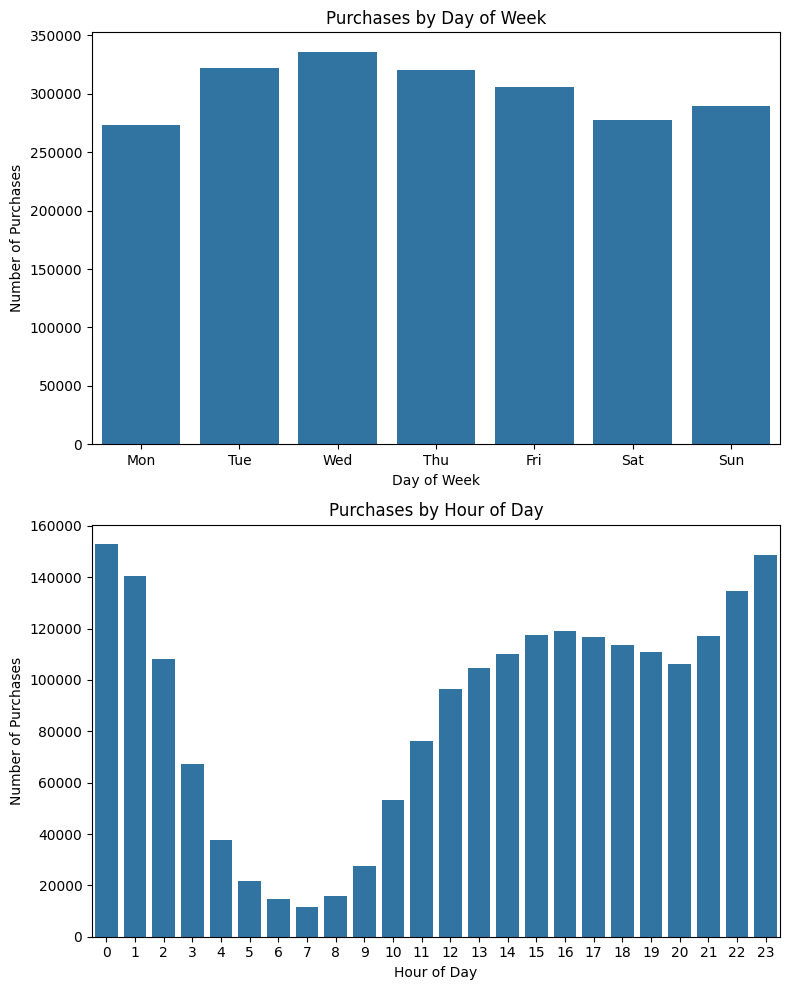


Purchases by Day of Week:
    event_time  purchase_count day_of_week
0           0          272979         Mon
1           1          322102         Tue
2           2          335814         Wed
3           3          319948         Thu
4           4          305453         Fri
5           5          277317         Sat
6           6          289493         Sun

Purchases by Hour:
     event_time  purchase_count
0            0          152798
1            1          140461
2            2          108095
3            3           67147
4            4           37755
5            5           21588
6            6           14502
7            7           11682
8            8           15894
9            9           27616
10          10           53213
11          11           76282
12          12           96387
13          13          104667
14          14          110213
15          15          117674
16          16          119140
17          17          116821
18          18          11

In [26]:
# Analyze purchase trends by date, day of week, and hour


# Number of purchases by day of week (Monday=0, Sunday=6)
purchase_by_weekday = data.groupby(data['event_time'].dt.dayofweek).size().reset_index(name='purchase_count')
purchase_by_weekday['day_of_week'] = purchase_by_weekday.index.map(
    {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'})

# Number of purchases by hour of day
purchase_by_hour = data.groupby(data['event_time'].dt.hour).size().reset_index(name='purchase_count')

plt.figure(figsize=(8,10))

plt.subplot(2, 1,1)
sns.barplot(x='day_of_week', y='purchase_count', data=purchase_by_weekday)
plt.xlabel('Day of Week')
plt.ylabel('Number of Purchases')
plt.title('Purchases by Day of Week')

plt.subplot(2, 1,2)
sns.barplot(x='event_time', y='purchase_count', data=purchase_by_hour)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.title('Purchases by Hour of Day')

plt.tight_layout()
plt.show()

# Display the dataframes
print("\nPurchases by Day of Week:\n", purchase_by_weekday)
print("\nPurchases by Hour:\n", purchase_by_hour)

### Daily summary table

In [27]:
daily_summary_table = data.groupby(by=[data['event_time'].dt.normalize()]).agg(Number_of_daily_visits=('user_session',lambda x: x.nunique()),
                                                                                  Number_of_daily_visitors=('user_id',lambda x: x.nunique())
                                                                                  )
sales_filter = data['event_type']=='purchase'
sales = data.loc[sales_filter].groupby(by=[data['event_time'].dt.normalize()]).agg(number_of_daily_sales=('event_type','count'),
                                                                                      Total_daily_sales=('price','sum')
                                                                                      ).reset_index()
daily_summary_table = pd.merge(left=daily_summary_table,
                          right=sales,
                          left_on=['event_time'],
                          right_on=['event_time'],
                          how='left')
daily_summary_table['conversion_rate']=daily_summary_table['number_of_daily_sales']/daily_summary_table['Number_of_daily_visits']

In [28]:
daily_summary_table.head()

,event_time,Number_of_daily_visits,Number_of_daily_visitors,number_of_daily_sales,Total_daily_sales,conversion_rate
0,2019-10-01 00:00:00+08:00,10439,7531,726,244305.50,0.069547
1,2019-10-02 00:00:00+08:00,13538,9569,1035,328713.97,0.076451
2,2019-10-03 00:00:00+08:00,12245,8589,967,298127.05,0.078971
3,2019-10-04 00:00:00+08:00,14838,10330,1310,439109.09,0.088287
4,2019-10-05 00:00:00+08:00,13840,9795,1145,354592.60,0.082731


In [29]:
# Daily Sales
print('Daily Sales Statistics')
print('-' * 50)
print(daily_summary_table['number_of_daily_sales'].describe())
print('-' * 50)
print('Sales  Statistics by Dates')
print('-' * 50)
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['number_of_daily_sales'].describe())


Daily Sales Statistics
--------------------------------------------------
count      32.000000
mean     1134.281250
std       238.542785
min       176.000000
25%      1046.500000
50%      1157.500000
75%      1268.250000
max      1496.000000
Name: number_of_daily_sales, dtype: float64
--------------------------------------------------
Sales  Statistics by Dates
--------------------------------------------------
            count     mean         std     min      25%     50%      75%  \
event_time                                                                 
Friday        5.0  1050.80  489.919075   176.0  1227.00  1266.0  1275.00   
Monday        4.0  1185.75  210.514251  1000.0  1029.25  1143.5  1300.00   
Saturday      4.0  1173.25  100.181086  1049.0  1121.00  1180.5  1232.75   
Sunday        4.0  1201.75  110.487933  1115.0  1121.75  1169.5  1249.50   
Thursday      5.0  1143.60  182.021427   967.0  1058.00  1067.0  1189.00   
Tuesday       5.0  1038.80  205.656753   726.0   947.

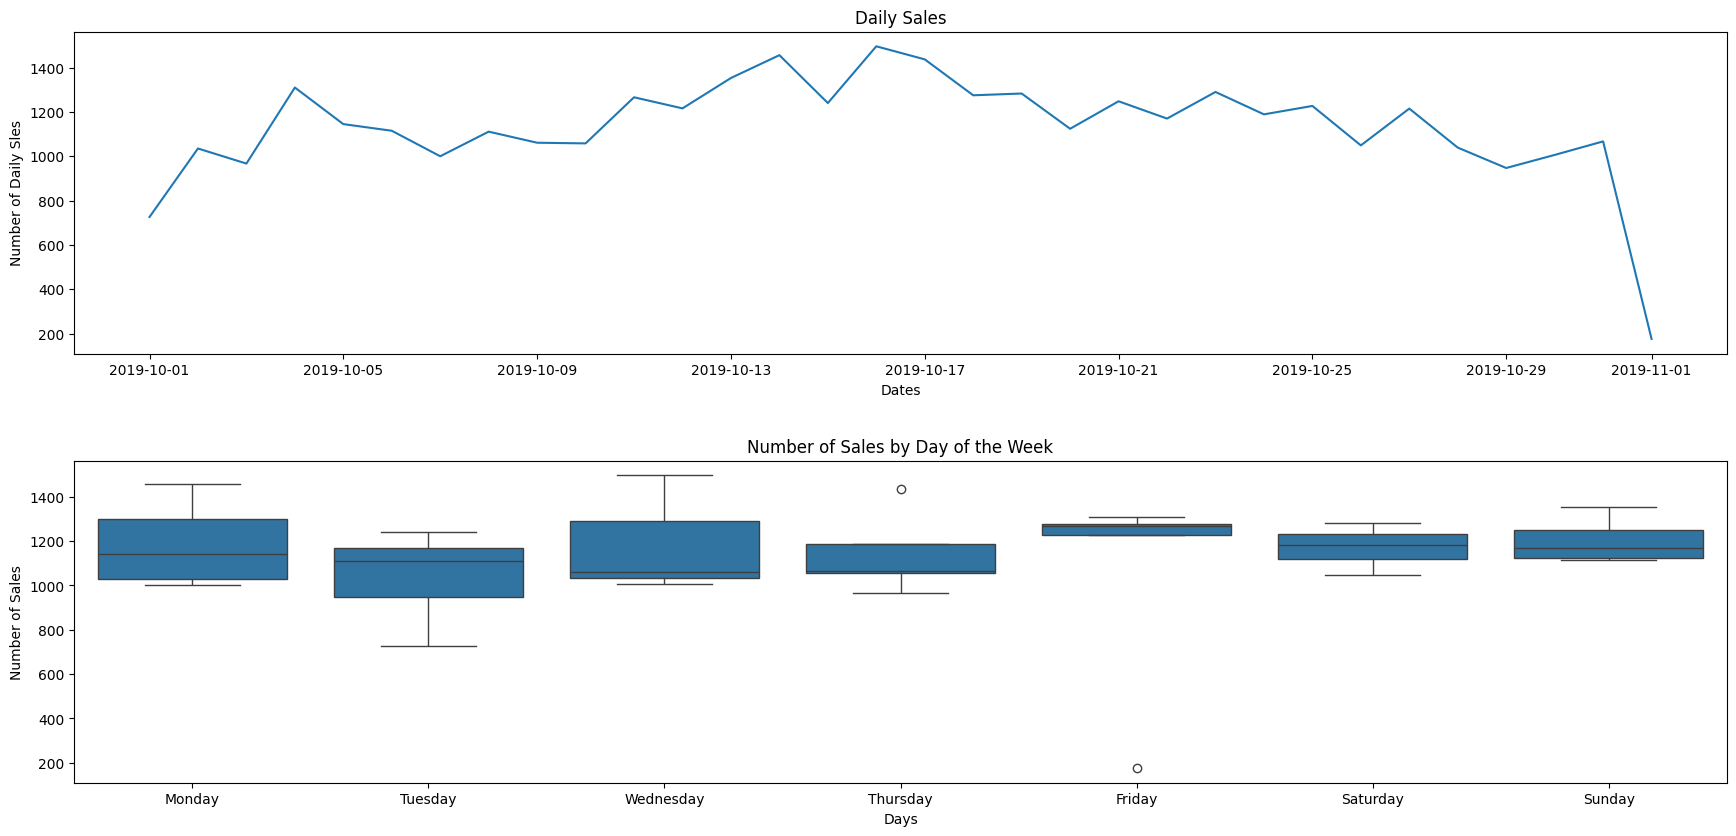

In [30]:
# Plotting the number of daily 
fig = plt.figure(figsize=(18, 9))

# Line plot for daily visits
ax1 = fig.add_subplot(2, 1, 1)
sns.lineplot(x='event_time',
             y='number_of_daily_sales',
             data=daily_summary_table,
             ax=ax1)
plt.title('Daily Sales')
plt.ylabel('Number of Daily Sles')
plt.xlabel('Dates')

# Box plot for sales by day of the week
ax2 = fig.add_subplot(2, 1, 2)
sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='number_of_daily_sales',
            data=daily_summary_table,
            ax=ax2)
plt.title('Number of Sales by Day of the Week')
plt.ylabel('Number of Sales')
plt.xlabel('Days')
plt.xticks([0, 1, 2, 3, 4, 5, 6], 
           ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
fig.tight_layout(pad=3.0)


## Target Product for analysis

In [31]:
# Select the target product with the highest purchase frequency
target_product_id = data[data['event_type'] == 'purchase']['product_id'].value_counts().idxmax()


###  Positive and Negative Samples

In [32]:
# Create Positive and Negative Samples

# Positive cases: Users who viewed and purchased the target product
positive_samples = data[(data['product_id'] == target_product_id) & (data['event_type'] == 'purchase')]

# Negative cases: Users who viewed but did not purchase the target product
views_of_target = data[(data['product_id'] == target_product_id) & (data['event_type'] == 'view')]
negative_samples = views_of_target[~views_of_target['user_id'].isin(positive_samples['user_id'])]

# Combine positive and negative samples
positive_samples['purchase'] = 1
negative_samples['purchase'] = 0
target_data = pd.concat([positive_samples, negative_samples])

C:\Users\12626\AppData\Local\Temp\ipykernel_6624\471865917.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_samples['purchase'] = 1
C:\Users\12626\AppData\Local\Temp\ipykernel_6624\471865917.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_samples['purchase'] = 0


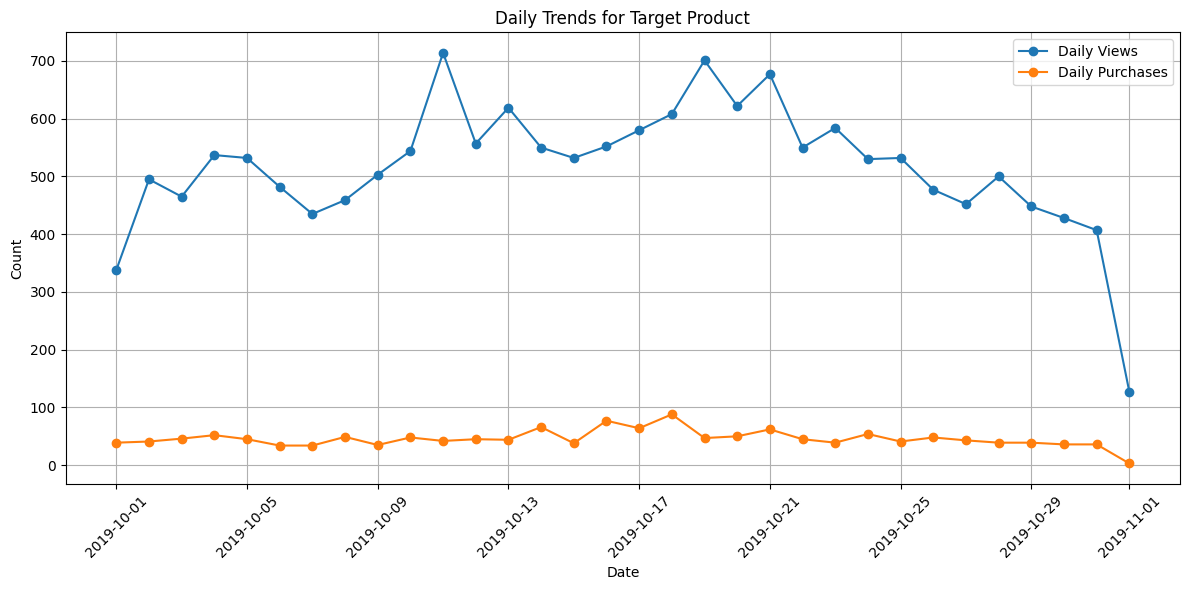

In [34]:
target_data ['event_time'] = pd.to_datetime(target_data ['event_time'])

# Aggregate trends by day
daily_trends = target_data .groupby(target_data ['event_time'].dt.date).agg(
    daily_views=('event_type', lambda x: (x == 'view').sum()),
    daily_purchases=('event_type', lambda x: (x == 'purchase').sum())
).reset_index()

# Plot trends
plt.figure(figsize=(12, 6))
plt.plot(daily_trends['event_time'], daily_trends['daily_views'], label='Daily Views', marker='o')
plt.plot(daily_trends['event_time'], daily_trends['daily_purchases'], label='Daily Purchases', marker='o')
plt.title('Daily Trends for Target Product')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
